In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
# import seaborn as sns

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [11]:
import tensorflow as tf

In [12]:
# Keras
import keras
from keras import regularizers
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint

# EDA

In [92]:
X_train = pd.read_csv('../TiffanyFiles/original_mfcc_data.csv/X_train.csv')
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
0,-8.168067,-7.800436,-7.915756,-7.994529,-8.202874,-7.465539,-7.377965,-7.568701,-8.213524,-10.430226,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-2.702354,-4.649492,-7.547175,-7.703742,-7.041406,-7.379449,-7.598666,-9.199607,-10.556303,-10.907008,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-13.114061,-13.371377,-14.944333,-14.832129,-13.873511,-14.302903,-14.765977,-14.291303,-14.661263,-15.531026,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-12.917717,-13.771543,-13.210535,-13.364563,-14.720303,-15.919627,-16.297949,-15.101595,-13.588952,-14.360147,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-9.380492,-11.417166,-13.007054,-13.997663,-13.345899,-14.623080,-16.086489,-14.464224,-12.293569,-10.813901,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [93]:
y_train = pd.read_csv('y_train.csv')
y_train.head()

,label
0,3
1,0
2,3
3,3
4,0


In [96]:
print(y_train['label'].unique())
print(y_train['label'].nunique())

classes = y_train['label'].nunique()
classes

[3 0 5 4 1 2]
6


6

In [97]:
X_test = pd.read_csv('X_test.csv')
X_test.head()

,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
0,-13.083993,-13.687945,-13.298521,-13.990982,-14.618415,-15.586377,-15.835006,-14.492863,-14.111957,-14.733546,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-12.674339,-12.900522,-11.405287,-11.954521,-13.132729,-11.839126,-12.810223,-13.163071,-12.615635,-11.703779,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-9.821266,-9.950452,-9.805934,-8.981818,-8.939062,-10.652815,-11.612457,-12.012306,-11.050820,-8.898211,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-16.126686,-15.113317,-15.780532,-15.500236,-14.640756,-15.195027,-15.745050,-15.891955,-14.633769,-14.402689,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-10.004100,-9.035198,-8.765038,-8.844861,-9.404778,-9.471016,-8.253861,-6.607890,-6.418004,-6.296650,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
y_test = pd.read_csv('y_test.csv')
y_test.head()

,label
0,4
1,3
2,4
3,1
4,2


In [20]:
# Check out the data
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')
print(f'X_train %: {X_train.shape[0] / (X_train.shape[0] + X_test.shape[0])}')
print(f'X_train %: {X_test.shape[0] / (X_train.shape[0] + X_test.shape[0])}')

X_train shape: (5953, 216)
y_train shape: (5953, 1)
X_test shape: (1489, 216)
y_test shape: (1489, 1)
X_train %: 0.7999193765116904
X_train %: 0.2000806234883096


In [21]:
from sklearn.preprocessing import StandardScaler
#Normalize the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scalled = scaler.transform(X_train)
X_test_scalled = scaler.transform(X_test)

In [22]:
from sklearn.tree import DecisionTreeClassifier

#fitting the DT
DT_model_one = DecisionTreeClassifier()
DT_model_one.fit(X_train_scalled, y_train)
DT_model_one_pred = DT_model_one.predict(X_test_scalled)
#Getting the score
print(f"The classification accuracy is: {DT_model_one.score(X_train, y_train)}")
print(f"The classification accuracy is: {DT_model_one.score(X_test, y_test)}")

The classification accuracy is: 0.24088694775743322
The classification accuracy is: 0.2619207521826729


In [23]:
DT_model_one_score = accuracy_score(y_test, DT_model_one_pred)
print(DT_model_one_score)

0.27468099395567497


In [26]:
X_train_scalled = np.array(X_train_scalled)
y_train = np.array(y_train)
X_test_scalled = np.array(X_test_scalled)
y_test = np.array(y_test)

In [33]:
print(f'X_train shape: {X_train_scalled.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test_scalled.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (5953, 216)
y_train shape: (5953, 6)
X_test shape: (1489, 216)
y_test shape: (1489, 6)


In [107]:
print(y_train)

      label
0         3
1         0
2         3
3         3
4         0
...     ...
5948      3
5949      5
5950      5
5951      2
5952      1

[5953 rows x 1 columns]


In [36]:
X_traincnn = np.expand_dims(X_train_scalled, axis=2)
X_testcnn = np.expand_dims(X_test_scalled, axis=2)
X_traincnn.shape

(5953, 216, 1)

In [109]:
# New model
lr=0.0001
model = Sequential()
model.add(Conv1D(256, 8, padding='same',input_shape=(X_train.shape[1],1)))
model.add(Activation('relu'))
model.add(Conv1D(256, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(classes))
model.add(Activation('softmax'))
opt = keras.optimizers.RMSprop(lr=lr, decay=1e-6)
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_16 (Conv1D)           (None, 216, 256)          2304      
_________________________________________________________________
activation_18 (Activation)   (None, 216, 256)          0         
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 216, 256)          524544    
_________________________________________________________________
batch_normalization_4 (Batch (None, 216, 256)          1024      
_________________________________________________________________
activation_19 (Activation)   (None, 216, 256)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 216, 256)          0         
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 27, 256)          

In [48]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
model_history=model.fit(X_traincnn, y_train, batch_size=16, epochs=20, validation_data=(X_testcnn, y_test))

Epoch 1/20
373/373 [==============================] - 54s 140ms/step - loss: 1.4479 - accuracy: 0.4045 - val_loss: 1.5091 - val_accuracy: 0.3976
Epoch 2/20
373/373 [==============================] - 49s 132ms/step - loss: 1.4455 - accuracy: 0.4075 - val_loss: 1.5207 - val_accuracy: 0.3862
Epoch 3/20
373/373 [==============================] - 50s 134ms/step - loss: 1.4204 - accuracy: 0.4115 - val_loss: 1.4953 - val_accuracy: 0.3895
Epoch 4/20
373/373 [==============================] - 49s 131ms/step - loss: 1.4197 - accuracy: 0.4237 - val_loss: 1.4938 - val_accuracy: 0.3956
Epoch 5/20
373/373 [==============================] - 49s 130ms/step - loss: 1.4226 - accuracy: 0.4153 - val_loss: 1.5295 - val_accuracy: 0.3734
Epoch 6/20
373/373 [==============================] - 49s 131ms/step - loss: 1.4196 - accuracy: 0.4261 - val_loss: 1.5099 - val_accuracy: 0.3855
Epoch 7/20
373/373 [==============================] - 50s 134ms/step - loss: 1.4059 - accuracy: 0.4257 - val_loss: 1.5064 - val_ac

In [78]:
model_pred = model.predict(X_testcnn, batch_size=16, verbose=1)

94/94 [==============================] - 3s 29ms/step


In [79]:
model_pred=model_pred.argmax(axis=1)
model_pred

array([1, 2, 0, ..., 5, 4, 5])

In [80]:
model_pred.shape

(1489,)

In [81]:
y_testf=y_test.argmax(axis=1)
y_testf
y_testf.shape

(1489,)

In [82]:
accuracy_score(model_pred, y_testf)

0.3828072531900604

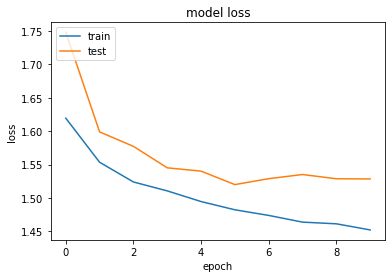

In [47]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [41]:
score = model.evaluate(X_testcnn, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

accuracy: 37.94%


# New model: drop Disgust and Fear

In [2]:
df = pd.read_csv('data.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,label
0,-9.620732,-6.468153,-5.925110,-6.729927,-8.394912,-12.471506,-13.474622,-14.074455,-13.747945,-12.962654,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Angry
1,-16.037386,-11.193971,-8.674429,-10.208759,-11.293220,-12.851307,-12.869898,-12.397981,-12.449426,-14.081515,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Disgust
2,-7.326170,-6.825267,-9.066109,-11.684609,-12.352726,-11.807521,-11.920674,-10.837593,-11.293701,-12.753458,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fear
3,-7.011128,-5.996286,-5.341102,-7.025241,-10.693501,-12.206599,-13.182552,-13.513250,-12.829860,-13.151039,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Happy
4,-13.136120,-11.512733,-10.225630,-9.838783,-9.236116,-11.287755,-15.745927,-17.706661,-18.655682,-16.432726,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neutral


In [3]:
df_new = df[df.label != 'Disgust']
df_new.head()

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,label
0,-9.620732,-6.468153,-5.925110,-6.729927,-8.394912,-12.471506,-13.474622,-14.074455,-13.747945,-12.962654,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Angry
2,-7.326170,-6.825267,-9.066109,-11.684609,-12.352726,-11.807521,-11.920674,-10.837593,-11.293701,-12.753458,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fear
3,-7.011128,-5.996286,-5.341102,-7.025241,-10.693501,-12.206599,-13.182552,-13.513250,-12.829860,-13.151039,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Happy
4,-13.136120,-11.512733,-10.225630,-9.838783,-9.236116,-11.287755,-15.745927,-17.706661,-18.655682,-16.432726,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neutral
5,-19.662958,-18.617884,-17.667177,-17.853739,-18.893433,-18.003851,-17.977943,-17.410961,-18.032400,-19.424118,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sad


In [4]:
df_new = df_new[df_new.label != 'Fear']
df_new.head()

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,label
0,-9.620732,-6.468153,-5.925110,-6.729927,-8.394912,-12.471506,-13.474622,-14.074455,-13.747945,-12.962654,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Angry
3,-7.011128,-5.996286,-5.341102,-7.025241,-10.693501,-12.206599,-13.182552,-13.513250,-12.829860,-13.151039,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Happy
4,-13.136120,-11.512733,-10.225630,-9.838783,-9.236116,-11.287755,-15.745927,-17.706661,-18.655682,-16.432726,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neutral
5,-19.662958,-18.617884,-17.667177,-17.853739,-18.893433,-18.003851,-17.977943,-17.410961,-18.032400,-19.424118,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sad
6,-12.876459,-12.214508,-13.006983,-12.768882,-10.208920,-9.869619,-10.150848,-9.379992,-10.011309,-11.522171,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Angry


In [5]:
classes_new = df_new.label.nunique()
classes_new

4

In [6]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(df_new.drop(['label'],axis=1)
                                                    , df_new.label
                                                    , test_size=0.2
                                                    , shuffle=True
                                                    , random_state=42
                                                   )

In [7]:
# Check out the data
print(f'X_train shape: {X_train_new.shape}')
print(f'y_train shape: {y_train_new.shape}')
print(f'X_test shape: {X_test_new.shape}')
print(f'y_test shape: {y_test_new.shape}')
print(f'X_train %: {X_train_new.shape[0] / (X_train_new.shape[0] + X_test_new.shape[0])}')
print(f'X_train %: {X_test_new.shape[0] / (X_train_new.shape[0] + X_test_new.shape[0])}')

X_train shape: (3920, 216)
y_train shape: (3920,)
X_test shape: (980, 216)
y_test shape: (980,)
X_train %: 0.8
X_train %: 0.2


In [13]:
# Lets few preparation steps to get it into the correct format for Keras 
X_traincnn_new = np.array(X_train_new)
y_traincnn_new = np.array(y_train_new)
X_testcnn_new = np.array(X_test_new)
y_testcnn_new = np.array(y_test_new)

# one hot encode the target 
lb = LabelEncoder()
y_traincnn_new = np_utils.to_categorical(lb.fit_transform(y_traincnn_new))
y_testcnn_new = np_utils.to_categorical(lb.fit_transform(y_testcnn_new))

In [14]:
X_traincnn_new = np.expand_dims(X_traincnn_new, axis=2)
X_testcnn_new = np.expand_dims(X_testcnn_new, axis=2)
X_traincnn_new.shape

(3920, 216, 1)

In [16]:
# New model
model = Sequential()
model.add(Conv1D(256, 8, padding='same',input_shape=(X_traincnn_new.shape[1],1)))  # X_train.shape[1] = No. of Columns
model.add(Activation('relu'))
model.add(Conv1D(256, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(classes_new)) # Target class number
model.add(Activation('softmax'))
# opt = keras.optimizers.SGD(lr=0.0001, momentum=0.0, decay=0.0, nesterov=False)
# opt = keras.optimizers.Adam(lr=0.0001)
opt = keras.optimizers.RMSprop(lr=0.001, decay=1e-6)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 216, 256)          2304      
_________________________________________________________________
activation (Activation)      (None, 216, 256)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 216, 256)          524544    
_________________________________________________________________
batch_normalization (BatchNo (None, 216, 256)          1024      
_________________________________________________________________
activation_1 (Activation)    (None, 216, 256)          0         
_________________________________________________________________
dropout (Dropout)            (None, 216, 256)          0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 27, 256)          

In [17]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
model_history=model.fit(X_traincnn_new, y_traincnn_new, batch_size=16, epochs=10, validation_data=(X_testcnn_new, y_testcnn_new))

Epoch 1/10
245/245 [==============================] - 33s 128ms/step - loss: 1.2106 - accuracy: 0.4378 - val_loss: 1.2793 - val_accuracy: 0.4633
Epoch 2/10
245/245 [==============================] - 32s 129ms/step - loss: 1.1052 - accuracy: 0.5254 - val_loss: 1.1417 - val_accuracy: 0.5327
Epoch 3/10
245/245 [==============================] - 32s 130ms/step - loss: 1.0751 - accuracy: 0.5115 - val_loss: 1.0861 - val_accuracy: 0.5235
Epoch 4/10
245/245 [==============================] - 32s 130ms/step - loss: 1.0243 - accuracy: 0.5567 - val_loss: 1.1041 - val_accuracy: 0.5092
Epoch 5/10
245/245 [==============================] - 32s 129ms/step - loss: 1.0294 - accuracy: 0.5589 - val_loss: 1.0861 - val_accuracy: 0.5286
Epoch 6/10
245/245 [==============================] - 32s 129ms/step - loss: 1.0185 - accuracy: 0.5668 - val_loss: 1.0347 - val_accuracy: 0.5327
Epoch 7/10
245/245 [==============================] - 32s 131ms/step - loss: 1.0065 - accuracy: 0.5613 - val_loss: 1.0605 - val_ac

In [18]:
model_pred = model.predict(X_testcnn_new, batch_size=16, verbose=1)

62/62 [==============================] - 2s 28ms/step


In [19]:
model_pred=model_pred.argmax(axis=1)
model_pred

array([0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 1, 3, 3, 2, 3, 2, 3, 2, 3, 0, 0, 1,
       3, 0, 3, 0, 3, 0, 3, 2, 1, 1, 3, 0, 0, 0, 1, 0, 2, 0, 3, 3, 2, 0,
       0, 3, 2, 3, 2, 1, 1, 2, 2, 0, 2, 0, 3, 0, 0, 0, 0, 1, 1, 0, 2, 0,
       3, 2, 0, 3, 0, 0, 0, 0, 0, 3, 0, 2, 0, 1, 0, 2, 0, 0, 3, 2, 1, 2,
       0, 1, 0, 2, 0, 0, 1, 2, 1, 0, 0, 0, 0, 2, 2, 0, 2, 0, 3, 1, 2, 1,
       3, 2, 2, 0, 0, 0, 3, 2, 0, 3, 2, 1, 2, 3, 0, 0, 0, 2, 3, 0, 2, 0,
       0, 2, 0, 0, 3, 3, 1, 0, 3, 0, 0, 0, 1, 0, 3, 3, 0, 1, 0, 0, 1, 1,
       0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 3, 2, 2, 0, 0, 2, 0, 3, 0, 0,
       3, 1, 1, 1, 0, 3, 0, 1, 2, 3, 0, 1, 3, 0, 3, 2, 0, 2, 2, 2, 0, 0,
       0, 0, 2, 1, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 1, 0, 1, 2,
       1, 0, 0, 2, 2, 0, 0, 2, 1, 3, 0, 0, 3, 1, 2, 2, 0, 0, 2, 0, 0, 0,
       1, 0, 2, 3, 0, 0, 1, 2, 3, 3, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 1,
       0, 2, 1, 3, 0, 1, 0, 0, 2, 3, 3, 0, 2, 0, 0, 1, 0, 0, 2, 3, 3, 2,
       3, 3, 0, 2, 0, 0, 3, 0, 0, 2, 2, 0, 1, 1, 3,

In [20]:
model_pred.shape

(980,)

In [22]:
y_testf = y_testcnn_new.argmax(axis=1)
y_testf
y_testf.shape

(980,)

In [23]:
accuracy_score(model_pred, y_testf)

0.49795918367346936

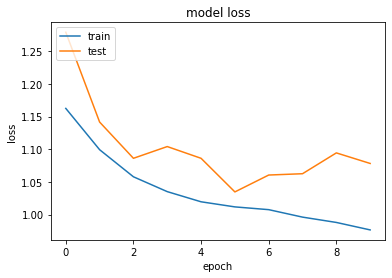

In [24]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [27]:
score = model.evaluate(X_testcnn_new, y_testcnn_new, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

accuracy: 49.80%
